# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("loan.csv", encoding="UTF-8", dtype={'next_pymnt_d': object})
pd.set_option('display.max_columns', 150)

# Data-Cleanup

### Checking shape, info, describe, nulls

In [3]:
df.shape

(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
round( df.isnull().sum() / len(df) * 100, 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Dropping cols where all 100% values are null

In [7]:
df.dropna(axis=1, how='all', inplace=True)

### describe() function tells some cols have only one type of values, droping these cols

In [8]:
cols = list(df)
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [9]:
cols_to_drop

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [10]:
df.drop(columns=cols_to_drop, inplace=True)

##### Dropping few text cols since we are not doing any NLP/NLU analysis
##### zip_code removed because we have states
##### desc removed because we have reasons

In [11]:
df.drop(columns=['url', 'emp_title', 'title', 'zip_code', 'desc'], inplace=True)

In [12]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0


#### Fixing % and months in few cols

In [13]:
df.term = df.term.str.replace("months", "").astype(int)
df.int_rate = df.int_rate.str.replace("%", "").astype(float)
df.revol_util = df.revol_util.str.replace("%", "").astype(float)

#### Analysing emp_length processing & cleaning

In [14]:
df.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [15]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

#### regex to replace year/years with empty, less than 1 with 0, 10+ with 10

In [16]:
df['emp_length']=df.emp_length.str.replace(r'years*', "", regex=True).str.replace("< 1", "0").str.replace(r'10\+', "10", regex=True).astype(float)

In [17]:
df.emp_length.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

#### replacing emp_length with median values, ie. 50% of describe() function

In [18]:
df.emp_length.fillna(df.emp_length.median(), inplace=True)

In [19]:
df.emp_length.describe()

count    39717.000000
mean         4.947101
std          3.517584
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

#### Analysing revol_util for processing & cleaning

In [20]:
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [21]:
df.revol_util.fillna(df.revol_util.mean(), inplace=True)

#### Analysing pub_rec_bankruptcies for processing & cleaning

In [22]:
df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [23]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### replacing pub_rec_bankruptcies missing values with highest occuring value

In [24]:
df.pub_rec_bankruptcies.fillna(0.0, inplace=True)

#### Cleaning dates: changing formats from Jan-15 to 2015/01

In [25]:
month_dict = {"Jan":'01', "Feb":'02', "Mar":'03', "Apr":'04', 
              "May":'05', "Jun":'06', "Jul":'07', "Aug":'08', 
              "Sep":'09', "Oct":'10', "Nov":'11', "Dec":'12', }

In [26]:
def fixdate(d):
    if type(d) is str:
        d=d.split("-")
        d = "20" + d[1] + "/" + month_dict[d[0]]
        return d
    return float('NaN')

In [27]:
df.last_pymnt_d=df.last_pymnt_d.apply(lambda x: fixdate(x))
df.next_pymnt_d=df.next_pymnt_d.apply(lambda x: fixdate(x))
df.last_credit_pull_d=df.last_credit_pull_d.apply(lambda x: fixdate(x))


#### rechecking nulls

In [28]:
round( df.isnull().sum() / len(df) * 100, 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.00
total_acc                   0.00
out_prncp                   0.00
out_prncp_

## Some rough work here

In [29]:
df[['mths_since_last_delinq', 'mths_since_last_record', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']].head()

,mths_since_last_delinq,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,NaN,NaN,2015/01,NaN,2016/05
1,NaN,NaN,2013/04,NaN,2013/09
2,NaN,NaN,2014/06,NaN,2016/05
3,35.0,NaN,2015/01,NaN,2016/04
4,38.0,NaN,2016/05,2016/06,2016/05


In [30]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

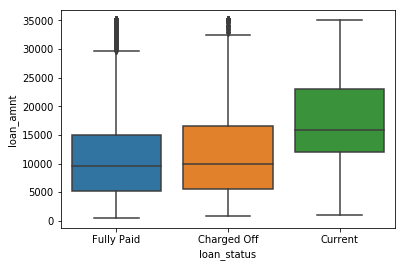

In [31]:


sns.boxplot(y='loan_amnt', x='loan_status', data=df)
plt.show()

/Users/arpitjoshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


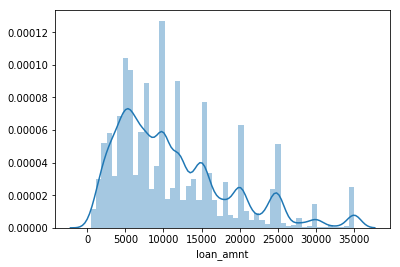

In [32]:
sns.distplot(df.loan_amnt)
plt.show()

(array([5033., 9891., 8108., 5121., 4155., 3166., 1228., 1733.,  489.,
         793.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

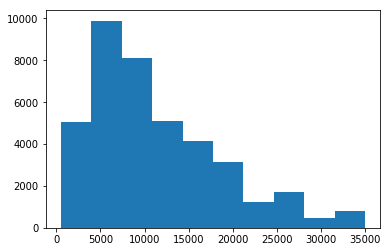

In [33]:
plt.hist(df.loan_amnt)

/Users/arpitjoshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


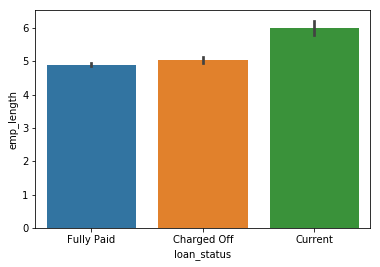

In [34]:
sns.barplot(y='emp_length', x='loan_status', data=df, estimator=np.mean)

In [35]:
df.drop(columns=['id', 'member_id'], inplace=True)

In [36]:
df[['loan_status', 'purpose', 'dti']].sort_values(by='dti')

,loan_status,purpose,dti
23232,Fully Paid,renewable_energy,0.00
16776,Fully Paid,car,0.00
32459,Charged Off,major_purchase,0.00
28248,Fully Paid,other,0.00
33863,Fully Paid,debt_consolidation,0.00
25903,Fully Paid,home_improvement,0.00
33838,Fully Paid,credit_card,0.00
38427,Fully Paid,debt_consolidation,0.00
16529,Fully Paid,house,0.00
7223,Current,small_business,0.00
